<a href="https://colab.research.google.com/github/SUNDAYTITILAYO/CMP700ACCESSMENT/blob/main/ACCESSMENT_PROGRESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing Neccessary Libraries**

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Mounting The Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/'Programming for Data analytics/Accessment file/12 stations

/content/drive/MyDrive/Programming for Data analytics/Accessment file/12 stations


In [ ]:
%ls

PRSA_Data_Aotizhongxin_20130301-20170228.csv  PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv     PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv      PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv        PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv      PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv       PRSA_Data_Wanshouxigong_20130301-20170228.csv


**Loading The Pandas Dataframe**

In [ ]:
import pandas as pd
aotizhongxin = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')
changping = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')
dingling = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')
dongsi = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv')
guanyuan = pd.read_csv('PRSA_Data_Guanyuan_20130301-20170228.csv')
gucheng = pd.read_csv('PRSA_Data_Gucheng_20130301-20170228.csv')
huairou = pd.read_csv('PRSA_Data_Huairou_20130301-20170228.csv')
nongzhanguan = pd.read_csv('PRSA_Data_Nongzhanguan_20130301-20170228.csv')
shunyi = pd.read_csv('PRSA_Data_Shunyi_20130301-20170228.csv')
tiantan = pd.read_csv('PRSA_Data_Tiantan_20130301-20170228.csv')
wanliu = pd.read_csv('PRSA_Data_Wanliu_20130301-20170228.csv')
wanshouxigong = pd.read_csv('PRSA_Data_Wanshouxigong_20130301-20170228.csv')

**Merging the dataset From The 12 Stations**

In [ ]:
df = pd.concat([
    aotizhongxin, changping, dingling, dongsi, guanyuan, gucheng,
    huairou, nongzhanguan, shunyi, tiantan, wanliu, wanshouxigong
], ignore_index=True)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


**Exploratory Data Analysis**

In [ ]:
df.shape

(420768, 18)

**Creating a Date Column in datetime format for the dataset**

In [ ]:
df['Date'] = pd.to_datetime(df[['year', 'month', 'day']])
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28


**Showing the columns in list format**

In [ ]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'Date'],
      dtype='object')

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       420768 non-null  int64         
 1   year     420768 non-null  int64         
 2   month    420768 non-null  int64         
 3   day      420768 non-null  int64         
 4   hour     420768 non-null  int64         
 5   PM2.5    412029 non-null  float64       
 6   PM10     414319 non-null  float64       
 7   SO2      411747 non-null  float64       
 8   NO2      408652 non-null  float64       
 9   CO       400067 non-null  float64       
 10  O3       407491 non-null  float64       
 11  TEMP     420370 non-null  float64       
 12  PRES     420375 non-null  float64       
 13  DEWP     420365 non-null  float64       
 14  RAIN     420378 non-null  float64       
 15  wd       418946 non-null  object        
 16  WSPM     420450 non-null  float64       
 17  station  4

**CHECKING FOR THE MISSING VALUES**

In [ ]:
Missing_values= df.isnull ().sum ()
Missing_values

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


**Percentage of Missing values**

In [ ]:
 Missing_values_percent = 100 * df.isnull().sum() / len(df)
 Missing_values_percent


,0
No,0.000000
year,0.000000
month,0.000000
day,0.000000
hour,0.000000
PM2.5,2.076916
PM10,1.532674
SO2,2.143937
NO2,2.879497
CO,4.919813


**Finding The Percentage Of Misssing Values In each columns and Sorting Them In a descending order in a styled Table for easy readability.**

In [ ]:

  Missing_Values_table= pd.concat([Missing_values, Missing_values_percent], axis=1)
  Missing_Values_table

  Missing_Values_table_ren_columns = Missing_Values_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  Missing_Values_table_ren_columns

  Missing_Values_table_ren_columns= Missing_Values_table_ren_columns.sort_values('% of Total Values', ascending=False).round(1)
  Missing_Values_table_ren_columns


  Missing_Values_table_ren_columns.style.background_gradient(cmap='Oranges')




,Missing Values,% of Total Values
CO,20701,4.900000
O3,13277,3.200000
NO2,12116,2.900000
SO2,9021,2.100000
PM2.5,8739,2.100000
PM10,6449,1.500000
wd,1822,0.400000
DEWP,403,0.100000
TEMP,398,0.100000
PRES,393,0.100000


**Filling The Missing Values**

In [ ]:
df['PM2.5']=df['PM2.5'].fillna((df['PM2.5'].median()))
df['PM10']=df['PM10'].fillna((df['PM10'].median()))
df['CO']=df['CO'].fillna((df['CO'].median()))
df['SO2']=df['SO2'].fillna((df['SO2'].median()))
df['NO2']=df['NO2'].fillna((df['NO2'].median()))
df['O3']=df['O3'].fillna((df['O3'].median()))
df['DEWP']=df['DEWP'].fillna((df['DEWP'].median()))
df['TEMP']=df['TEMP'].fillna((df['TEMP'].mean()))
df['PRES']=df['PRES'].fillna((df['PRES'].mean()))
df['RAIN']=df['RAIN'].fillna((df['RAIN'].median()))
df['WSPM']=df['WSPM'].fillna((df['WSPM'].median()))


**Dropping the wd Column**

In [ ]:
df = df.drop('wd', axis=1)

**Checking to see that there no more missing Values**

In [ ]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**TOTAL NUMBER OF STATIONS IN THE DATASET**

In [ ]:
stations= df['station'].value_counts()
print(f'Total number of stations in the dataset : {len(stations)}')
stations

Total number of stations in the dataset : 12


,count
station,
Aotizhongxin,35064
Changping,35064
Dingling,35064
Dongsi,35064
Guanyuan,35064
Gucheng,35064
Huairou,35064
Nongzhanguan,35064
Shunyi,35064


**VISUALISATION**

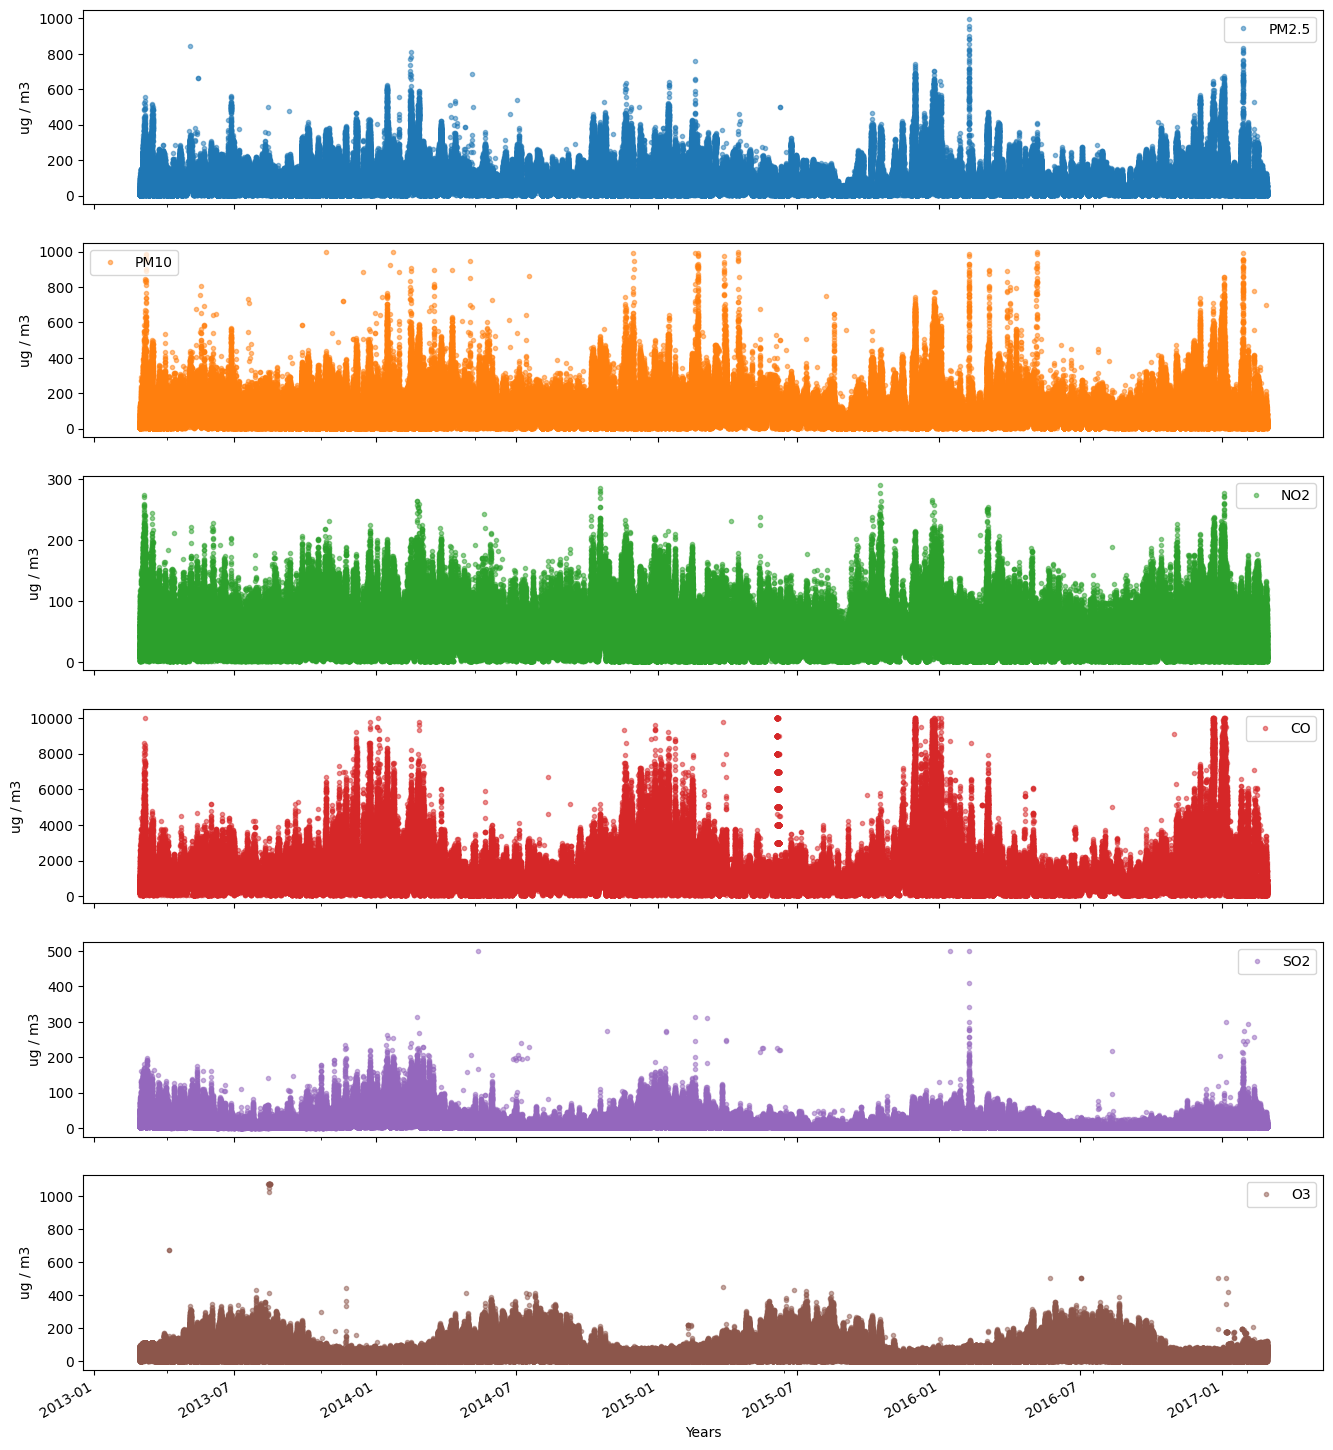

In [ ]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3',]
df.set_index('Date',inplace=True)
axes = df[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:

    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

**YEARWISE PLOT OF THE POLLUTANTS**

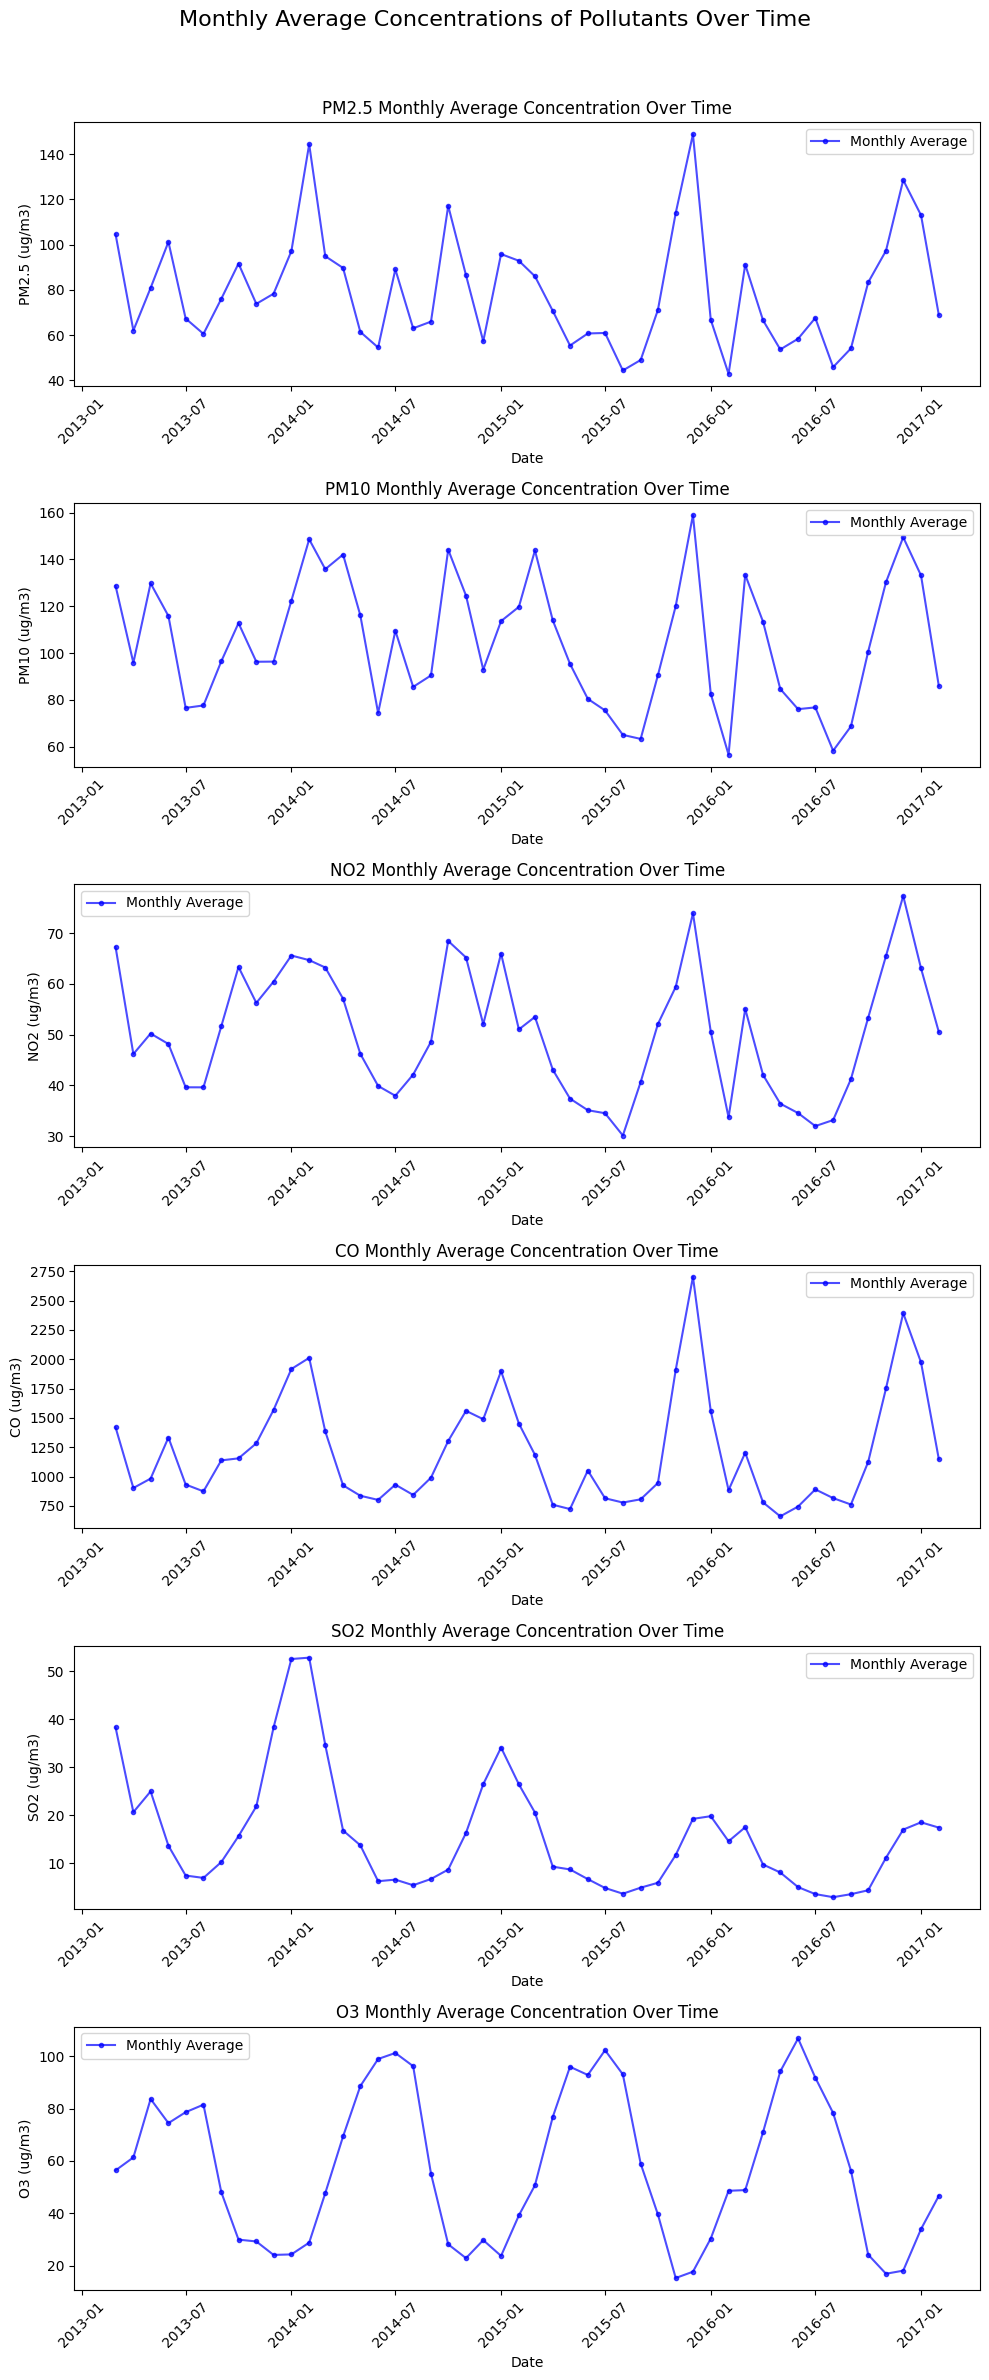

In [ ]:
# Group by Year and Month to calculate the monthly average for each pollutant
monthly_avg = df.groupby(['year','month'])[pollutants].mean().reset_index()
monthly_avg
# Create a Date column from Year and Month
monthly_avg['Date'] = pd.to_datetime(monthly_avg[['year', 'month']].assign(DAY=1))
monthly_avg
# Plotting the monthly average for each pollutant
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 25), sharex=False)

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    ax.plot(monthly_avg['Date'], monthly_avg[pollutant], marker='.', linestyle='-', color='blue', alpha=0.7, label='Monthly Average')
    ax.set_ylabel(f'{pollutant} (ug/m3)')
    ax.set_title(f'{pollutant} Monthly Average Concentration Over Time')
    ax.legend()
    ax.set_xlabel('Date')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Set a common title for the figure
fig.suptitle('Monthly Average Concentrations of Pollutants Over Time', fontsize=16)

plt.show()

**MONTHWISE PLOT OF THE POLLUTANTS**

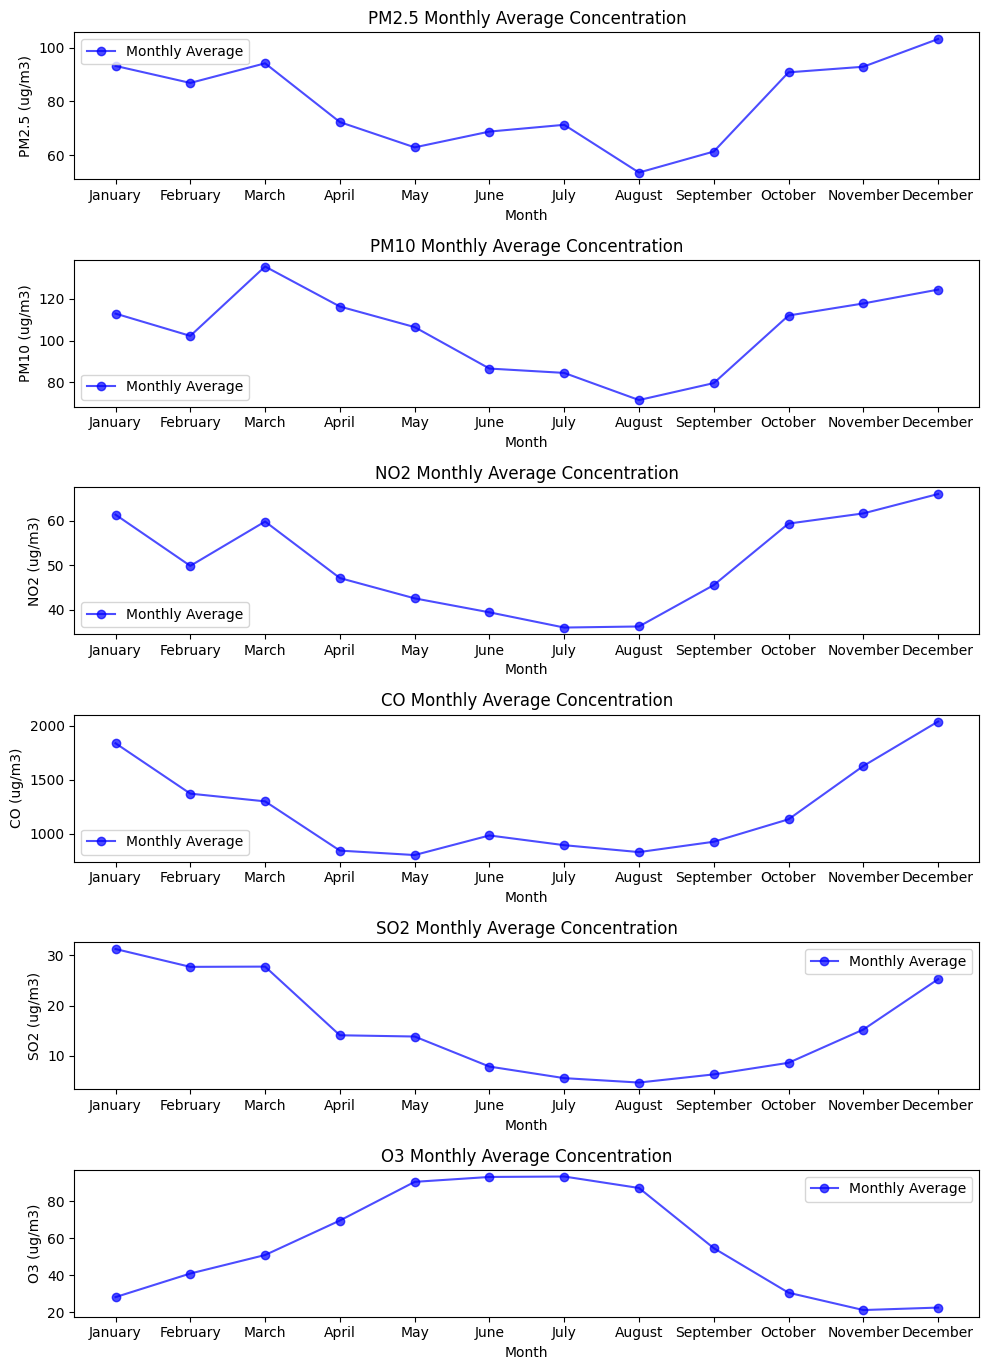

In [ ]:
# Group by Month to calculate the monthly average for each pollutant
monthly_avg = df.groupby('month')[pollutants].mean()
monthly_avg

# Plotting the monthly average for each pollutant
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 15), sharex=False)

# Define month names for x-axis labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    ax.plot(month_names, monthly_avg[pollutant], marker='o', linestyle='-', color='blue', alpha=0.7, label='Monthly Average')
    ax.set_ylabel(f'{pollutant} (ug/m3)')
    ax.set_title(f'{pollutant} Monthly Average Concentration')
    ax.legend()
    ax.set_xlabel('Month')  # Set x-axis label

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Set a common title for the figure
#fig.suptitle('Monthly Average Concentrations of Pollutants Over Time', fontsize=16)


plt.show()


The plot above shows that;
 PM2.5 has highest concentration in the month of December and January and it has lowest concentration in the month of August,
 PM10 has its highest concentration in the month of March and its lowest concentration in the month of August.
 NO2 has its highest concentration in the month of December and its lowest concentration in the month of July.
 CO has it's highest concentration in December and it's lowest concentration in the month of May and August
 O3 has a record high concentration in the month of May, June,July respectively and it's lowest concentration in the month of  November and December.
 The monthly average concentrations of PM2.5,PM10,NO2,CO is highest in the month of December while the concentration is at the lowest in the month of August.


**Most Dominant Pollutants:**

In [ ]:
pollutants =  ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3',]
pol=df[pollutants].mean()
pollutants_df=pol.to_frame().reset_index()
pollutants_df.columns=['Pollutant','Level']
pollutants_df

,Pollutant,Level
0,PM2.5,79.278489
1,PM10,104.256193
2,NO2,50.418633
3,CO,1214.493362
4,SO2,15.641507
5,O3,56.981874


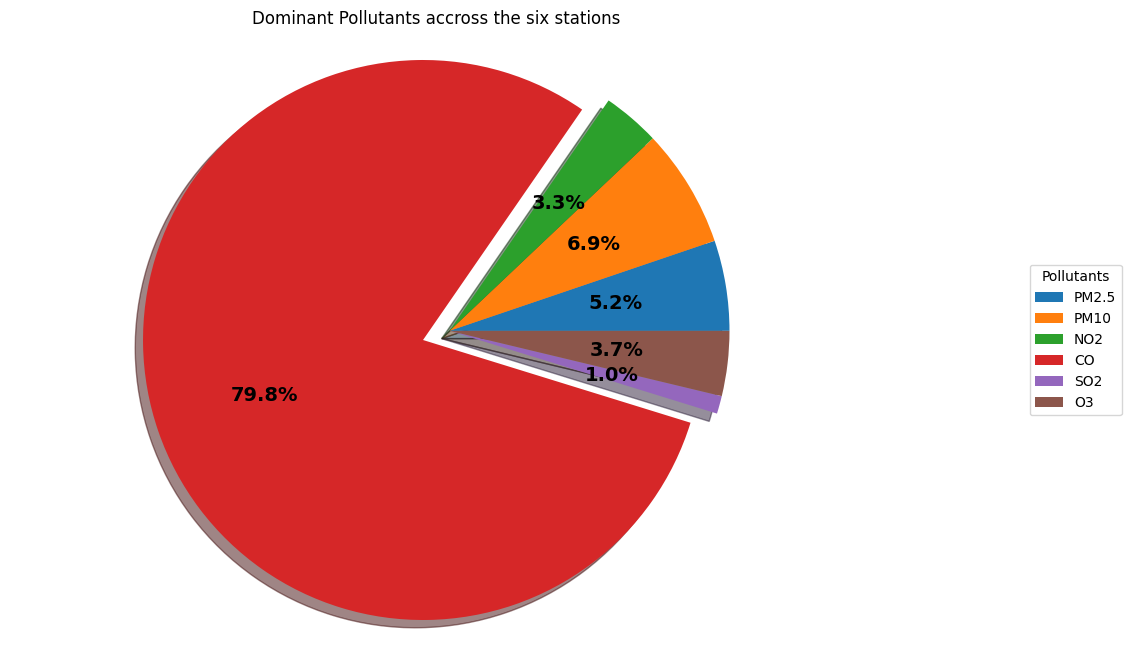

In [ ]:
plt.figure(figsize=(11,8))

labels = pollutants_df['Pollutant']
explode = [0, 0, 0, 0.1, 0, 0,]  # Exploding the first slice (PM2.5)

plt.title('Dominant Pollutants accross the six stations')
wedges, texts, autotexts = plt.pie(
    pollutants_df['Level'],
    explode=explode,
    autopct='%1.1f%%',
    shadow=True,
    startangle=0
)

plt.axis('equal')  # Ensures the pie chart is drawn as a circle

# Adding legend
plt.legend(
    wedges,
    labels,
    title="Pollutants",
    loc="center",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Setting the properties of the percentage texts
plt.setp(autotexts, size=14, weight='bold')

# Display the plot
plt.show()

From the Chart above, it is obvious that CO is the most Dominant poluttant accross the six station as it constitute over 79% of all the pollutants recorded accross the six stations. While SO2 is the least pollutant recorded accross the six stations as it constitute just 1% of the total pollutants recorded.

**DOMINANT POLLUTANT STATIONWISE**

In [ ]:
import pandas as pd

pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

# Group data by 'State' and calculate the mean of each pollutant
stationwise_pollution_means = df.groupby('station')[pollutants].mean()

# Find the dominant pollutant in each state
dominant_pollutant_by_stations = stationwise_pollution_means.idxmax(axis=1)

# Convert the result to a DataFrame for better readability
dominant_pollutant_df = dominant_pollutant_by_stations.reset_index()
dominant_pollutant_df.columns = ['station', 'Dominant Pollutant']

# Display the results
dominant_pollutant_df

,station,Dominant Pollutant
0,Aotizhongxin,CO
1,Changping,CO
2,Dingling,CO
3,Dongsi,CO
4,Guanyuan,CO
5,Gucheng,CO
6,Huairou,CO
7,Nongzhanguan,CO
8,Shunyi,CO
9,Tiantan,CO


It is apparent from the table that CO is the most dominant pollutant accross the six stations.

**CORRELATION BETWEEN DIFFERENT POLLUTANTS.**

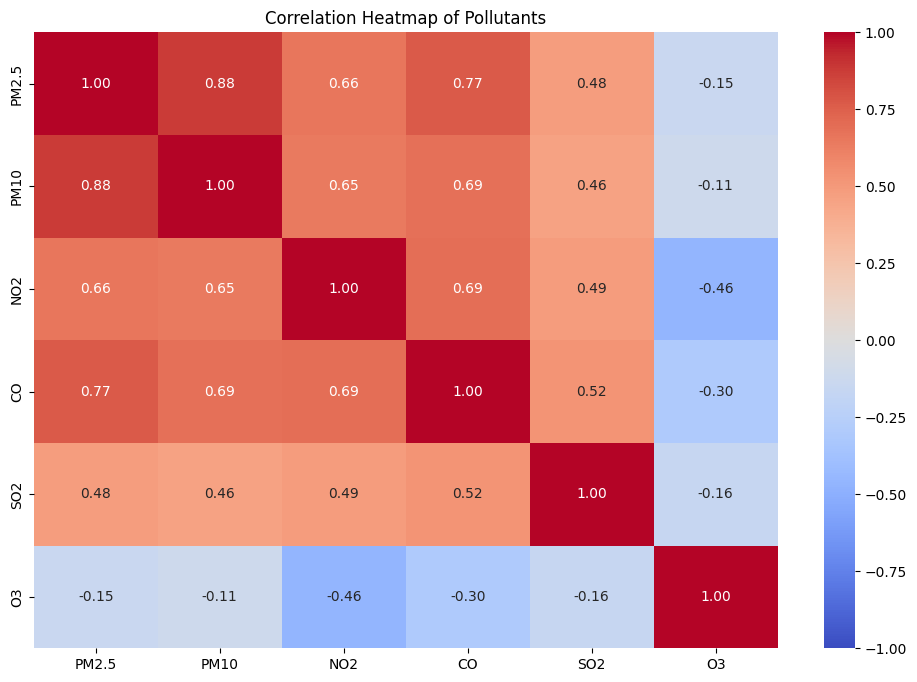

In [ ]:

# This assumes you want to include only the pollutants columns
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']
numeric_pollutants_df = df[pollutants]

# Convert data to numeric (this will handle any non-numeric values)
numeric_pollutants_df = numeric_pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values (if any)
numeric_pollutants_df = numeric_pollutants_df

# Calculate the correlation matrix
correlation_matrix = numeric_pollutants_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Pollutants')
plt.show()

In [ ]:
numeric_pollutants_df.corr()

,PM2.5,PM10,NO2,CO,SO2,O3
PM2.5,1.000000,0.879347,0.658526,0.767240,0.478022,-0.147683
PM10,0.879347,1.000000,0.645862,0.686253,0.458764,-0.109919
NO2,0.658526,0.645862,1.000000,0.687864,0.491557,-0.463401
CO,0.767240,0.686253,0.687864,1.000000,0.523455,-0.303764
SO2,0.478022,0.458764,0.491557,0.523455,1.000000,-0.161700
O3,-0.147683,-0.109919,-0.463401,-0.303764,-0.161700,1.000000


**AVERAGE POLLUTANT LEVEL ACROSS STATIONS**

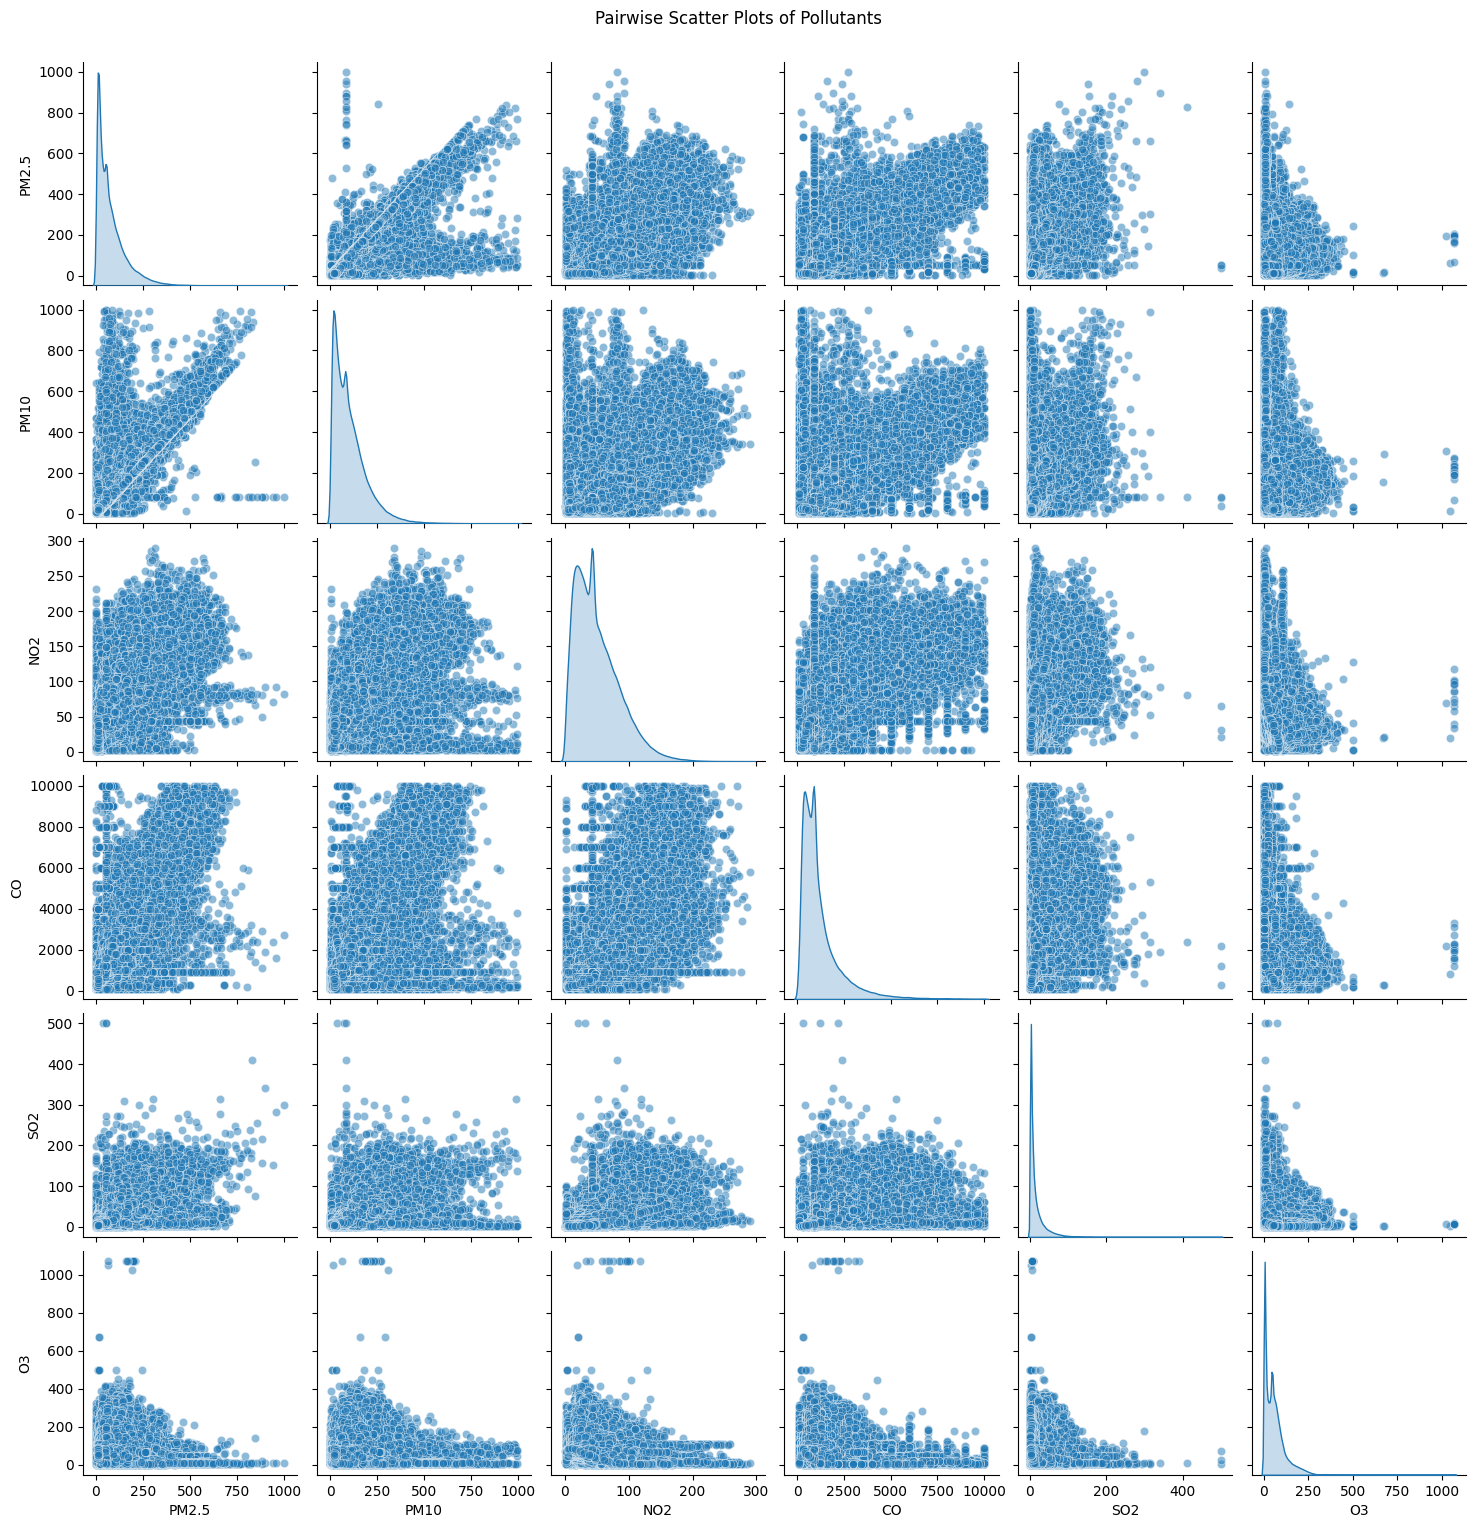

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame and it contains the pollutant columns
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

# Filter the DataFrame to include only the pollutant columns
pollutants_df = df[pollutants]

# Ensure all columns are numeric
pollutants_df = pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
pollutants_df = pollutants_df.dropna()

# Create scatter plots between each pair of pollutants
# Use pairplot from seaborn to plot all pairwise scatter plots
sns.pairplot(pollutants_df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Scatter Plots of Pollutants', y=1.02)
plt.show()

**PLOTTING AVERAGE POLLUTANT LEVEL ACCROSS STATIONS USING BARCHART**

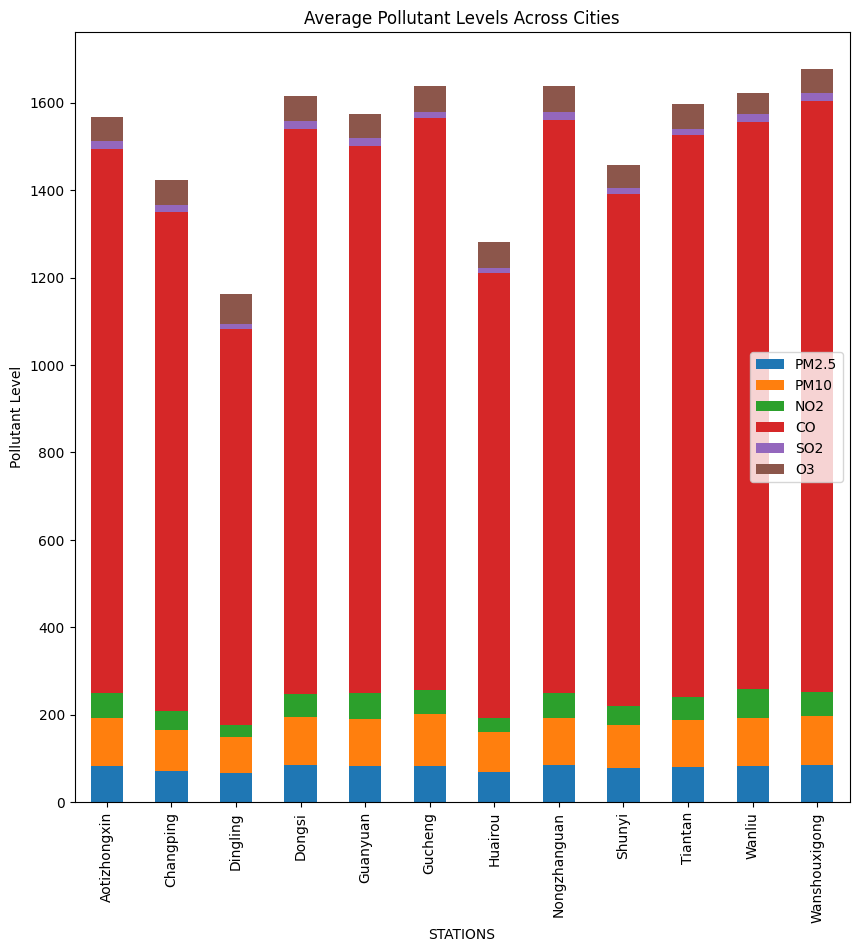

In [ ]:
# Define the pollutant columns
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

# Calculate the average levels of pollutants for each city
city_pollution = df.groupby('station')[pollutants].mean()

import matplotlib.pyplot as plt

# Plotting the average pollutants for each city
city_pollution.plot(kind="bar",
                 figsize=(10,10),
                 stacked=True)
plt.title('Average Pollutant Levels Across Cities')
plt.xlabel('STATIONS')
plt.ylabel('Pollutant Level')
plt.show()


The Plot above shows that stations Wanshouxigong,Nongzhanguan,Gucheng and Dongsi have the highest pollutant level while Dingling station has the lowest pollutant level.

**PLOTING THE LINEAR CORRELATION OF THE POLLUTANTS**

In [ ]:
pollutants_df

,PM2.5,PM10,NO2,CO,SO2,O3
Date,,,,,,
2013-03-01,4.0,4.0,7.0,300.0,4.0,77.0
2013-03-01,8.0,8.0,7.0,300.0,4.0,77.0
2013-03-01,7.0,7.0,10.0,300.0,5.0,73.0
2013-03-01,6.0,6.0,11.0,300.0,11.0,72.0
2013-03-01,3.0,3.0,12.0,300.0,12.0,72.0
...,...,...,...,...,...,...
2017-02-28,11.0,32.0,24.0,400.0,3.0,72.0
2017-02-28,13.0,32.0,41.0,500.0,3.0,50.0
2017-02-28,14.0,28.0,38.0,500.0,4.0,54.0


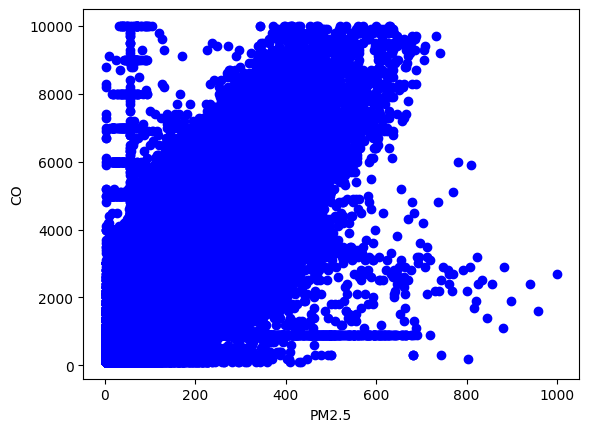

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['PM2.5'], df['CO'], color='blue')
plt.xlabel("PM2.5")
plt.ylabel("CO")
plt.show()

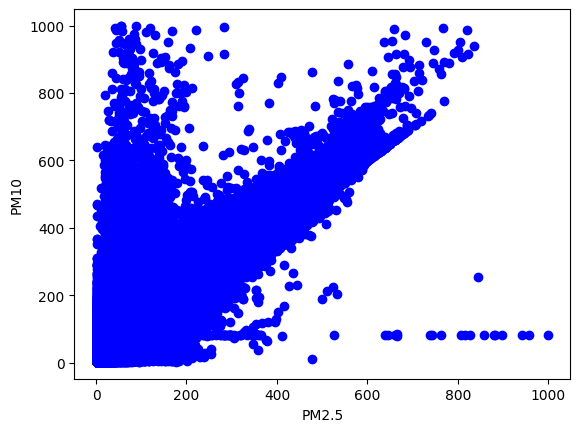

In [ ]:
plt.scatter(df['PM2.5'], df['PM10'], color='blue')
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.show()

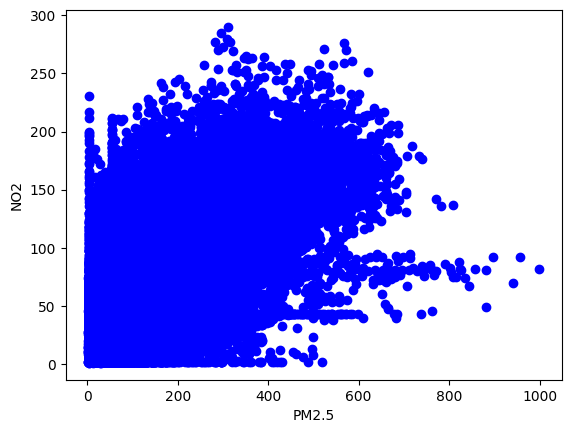

In [ ]:
plt.scatter(df['PM2.5'], df['NO2'], color='blue')
plt.xlabel("PM2.5")
plt.ylabel("NO2")
plt.show()

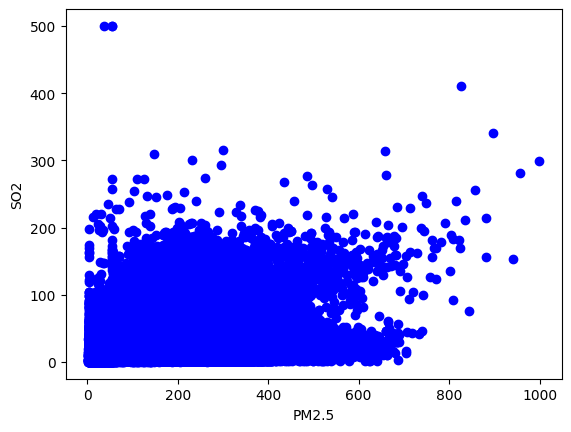

In [ ]:
plt.scatter(df['PM2.5'], df['SO2'], color='blue')
plt.xlabel("PM2.5")
plt.ylabel("SO2")
plt.show()

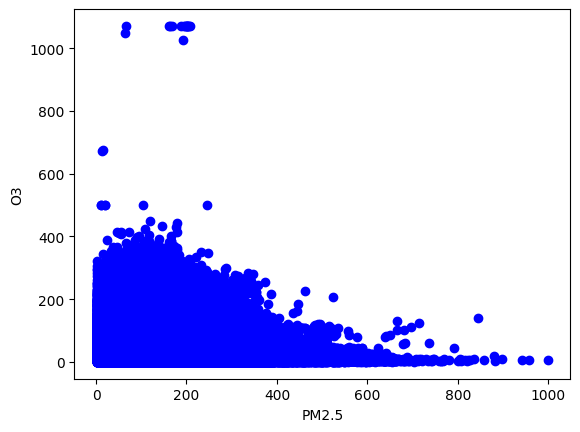

In [ ]:
plt.scatter(df['PM2.5'], df['O3'], color='blue')
plt.xlabel("PM2.5")
plt.ylabel("O3")
plt.show()

The above plottings shows that nearly all the pollutants are linearly correlated with Pm2.5, though not perfect but there is a significant level of correlation enough to attempt a Machine learning Model.

  **BUILDING MACHINE LEARNING MODELS WITH THE DATASET**

**Splitting the dataset into Dependent(Y) and Independent(X) Variable.**

In [76]:
x = df[['PM10','NO2','CO','SO2','O3']]
X= x.values
X

array([[  4.,   7., 300.,   4.,  77.],
       [  8.,   7., 300.,   4.,  77.],
       [  7.,  10., 300.,   5.,  73.],
       ...,
       [ 28.,  38., 500.,   4.,  54.],
       [ 23.,  30., 400.,   4.,  59.],
       [ 19.,  38., 600.,   4.,  49.]])

In [68]:
y= df['PM2.5']
Y= y.values
Y

array([ 4.,  8.,  7., ..., 14., 12., 13.])

In [82]:

from sklearn.model_selection import train_test_split # Import the train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

**Splitting the data into training and Testing data**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Building a Model Using Multiple Regression**

In [71]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
# fitting the training data
regr.fit(X_train,y_train)

LinearRegression()

In [77]:

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [0.02116435 0.56141363 0.12804529 0.02481521 0.05804111]
Intercept: -15.1021644766399


In [78]:
y_prediction =  regr.predict(X_test)
y_prediction

array([77.91854249, 43.01791445,  6.32481552, ..., 34.04681593,
       49.59869355, 12.05348125])

In [74]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mae
y_pred = regr.predict(X_test)

In [75]:
print ("Mean absolute error: %.2f" % mae (y_test,y_pred))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_prediction-y_test)**2))
print("R2-score: %.2f" % r2_score(y_prediction,y_test))

Mean absolute error: 1114.00
Residual sum of squares (MSE): 1114.00
R2-score: 0.79



An R2 score of 0.79 indicates that the model explains approximately 79% of the variance in the target variable ('PM2.5'). This is a solid score, suggesting that the model effectively captures a substantial portion of the patterns in the data.